### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [9]:
data = pd.read_csv('data/coupons.csv')

In [10]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<br>

#### First I will check how many null/NaN values exist in each column of the DataFrame

In [19]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

<br>

Obviously there are lots of NaN in the car column, let's check what values exist there

In [22]:
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

<br>

Since there are only less than 1% (108 over 12684) of the rows have valid values in the car column, and values in the column don't seem to be very related to whether the individual will accept a coupon, I can drop the car column for our investigation.


In [25]:
data = data.drop(columns=['car'])
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [27]:
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

<br>

There are some NaN in columns 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', about 1%~2% of the rows. I would drop those rows.

In [30]:
data = data.dropna()
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


<br>Let me doubke check that the DataFrame has not NaN anymore

In [33]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

<br><br>
#### Check Contents of The DataFrame

I will check values of all other columns in order to:
1. get familiar with the contents of each column and then the DataFrame
2. see if there are some values that may need to be cleaned up or removed
3. This also help me get a basic understanding of the distrinution of values in each column

In [37]:
data['destination'].value_counts()

destination
No Urgent Place    5970
Home               3085
Work               3024
Name: count, dtype: int64

In [39]:
data['Bar'].value_counts()

Bar
never    4934
less1    3394
1~3      2370
4~8      1054
gt8       327
Name: count, dtype: int64

In [41]:
# CarryAway
data['CarryAway'].value_counts()

CarryAway
1~3      4502
4~8      4083
less1    1790
gt8      1573
never     131
Name: count, dtype: int64

In [43]:
# passanger
data['passanger'].value_counts()

passanger
Alone        6969
Friend(s)    3148
Partner      1024
Kid(s)        938
Name: count, dtype: int64

In [45]:
data['weather'].value_counts()

weather
Sunny    9601
Snowy    1331
Rainy    1147
Name: count, dtype: int64

In [47]:
data['temperature'].value_counts()

temperature
80    6222
55    3662
30    2195
Name: count, dtype: int64

In [49]:
data['time'].value_counts()

time
6PM     3078
7AM     3024
10AM    2158
2PM     1916
10PM    1903
Name: count, dtype: int64

In [51]:
data['coupon'].value_counts()

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

In [53]:
data['expiration'].value_counts()

expiration
1d    6760
2h    5319
Name: count, dtype: int64

In [55]:
data['gender'].value_counts()

gender
Female    6199
Male      5880
Name: count, dtype: int64

In [57]:
data['age'].value_counts()

age
21         2537
26         2399
31         1925
50plus     1732
36         1253
41         1065
46          664
below21     504
Name: count, dtype: int64

In [59]:
data['maritalStatus'].value_counts()

maritalStatus
Married partner      4831
Single               4588
Unmarried partner    2048
Divorced              504
Widowed               108
Name: count, dtype: int64

In [61]:
data['has_children'].value_counts()

has_children
0    7145
1    4934
Name: count, dtype: int64

In [63]:
data['education'].value_counts()

education
Some college - no degree                  4219
Bachelors degree                          4021
Graduate degree (Masters or Doctorate)    1808
Associates degree                         1066
High School Graduate                       877
Some High School                            88
Name: count, dtype: int64

In [65]:
data['occupation'].value_counts()

occupation
Unemployed                                   1814
Student                                      1497
Computer & Mathematical                      1368
Sales & Related                              1072
Education&Training&Library                    855
Management                                    772
Office & Administrative Support               617
Arts Design Entertainment Sports & Media      564
Business & Financial                          516
Retired                                       473
Food Preparation & Serving Related            276
Healthcare Support                            242
Healthcare Practitioners & Technical          222
Legal                                         219
Community & Social Services                   219
Transportation & Material Moving              218
Protective Service                            175
Architecture & Engineering                    175
Life Physical Social Science                  170
Construction & Extraction              

In [67]:
data['income'].value_counts()

income
$25000 - $37499     1919
$12500 - $24999     1728
$100000 or More     1692
$37500 - $49999     1689
$50000 - $62499     1565
Less than $12500    1014
$62500 - $74999      840
$87500 - $99999      818
$75000 - $87499      814
Name: count, dtype: int64

In [69]:
data['Bar'].value_counts()

Bar
never    4934
less1    3394
1~3      2370
4~8      1054
gt8       327
Name: count, dtype: int64

In [71]:
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3298
1~3      3159
never    2852
4~8      1659
gt8      1111
Name: count, dtype: int64

In [73]:
data['CarryAway'].value_counts()

CarryAway
1~3      4502
4~8      4083
less1    1790
gt8      1573
never     131
Name: count, dtype: int64

In [75]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5163
4~8      3450
less1    2005
gt8      1285
never     176
Name: count, dtype: int64

In [77]:
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    5859
1~3      3202
never    2070
4~8       684
gt8       264
Name: count, dtype: int64

In [79]:
data['toCoupon_GEQ5min'].value_counts()

toCoupon_GEQ5min
1    12079
Name: count, dtype: int64

In [81]:
data['toCoupon_GEQ15min'].value_counts()

toCoupon_GEQ15min
1    6779
0    5300
Name: count, dtype: int64

In [83]:
data['toCoupon_GEQ25min'].value_counts()

toCoupon_GEQ25min
0    10637
1     1442
Name: count, dtype: int64

In [85]:
data['direction_same'].value_counts()

direction_same
0    9480
1    2599
Name: count, dtype: int64

In [87]:
data['direction_opp'].value_counts()

direction_opp
1    9480
0    2599
Name: count, dtype: int64

In [89]:
data['Y'].value_counts()

Y
1    6877
0    5202
Name: count, dtype: int64

<br><br>
__set pandas to display all columns__

In [92]:
# to display all columns
pd.set_option('display.max_columns', None)

In [94]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1411,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Female,50plus,Widowed,1,High School Graduate,Retired,$12500 - $24999,never,less1,1~3,4~8,less1,1,0,0,0,1,1
10448,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,36,Divorced,1,Some college - no degree,Office & Administrative Support,$25000 - $37499,never,gt8,4~8,4~8,less1,1,1,0,0,1,1
2798,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Female,26,Single,0,Associates degree,Unemployed,Less than $12500,1~3,less1,4~8,less1,4~8,1,0,0,0,1,1
3784,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,26,Single,0,Some college - no degree,Food Preparation & Serving Related,$25000 - $37499,1~3,1~3,1~3,1~3,less1,1,1,0,0,1,1
11259,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,31,Single,0,Some college - no degree,Transportation & Material Moving,$50000 - $62499,1~3,4~8,4~8,4~8,1~3,1,0,0,0,1,1
9049,No Urgent Place,Alone,Sunny,80,10PM,Restaurant(<20),1d,Male,31,Married partner,1,Bachelors degree,Computer & Mathematical,$62500 - $74999,never,less1,gt8,4~8,less1,1,0,0,0,1,1
9782,No Urgent Place,Alone,Sunny,80,10PM,Restaurant(<20),1d,Male,31,Single,0,Some college - no degree,Office & Administrative Support,$12500 - $24999,4~8,never,gt8,4~8,never,1,0,0,0,1,0
2786,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Female,26,Single,0,Associates degree,Unemployed,Less than $12500,1~3,less1,4~8,less1,4~8,1,0,0,0,1,1
1407,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,50plus,Widowed,1,High School Graduate,Retired,$12500 - $24999,never,less1,1~3,4~8,less1,1,1,1,0,1,1
3027,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Some college - no degree,Student,$12500 - $24999,less1,never,less1,less1,less1,1,0,0,0,1,0


<br>

3. Decide what to do about your missing data -- drop, replace, other...

In the previous section, the car column can be removed completely, other missings data(rows) were dropped by using dropna()

<br>

4. What proportion of the total observations chose to accept the coupon?



In [100]:
data['Y'].mean()

0.5693352098683666

<br>56.9% of the observations accept the coupon 

5. Use a bar plot to visualize the `coupon` column.

In [104]:
# Let's use groupby to count the number of each type of coupons
data.groupby('coupon').count()[['destination']].rename(columns={'destination': 'count'})

,count
coupon,
Bar,1913
Carry out & Take away,2280
Coffee House,3816
Restaurant(20-50),1417
Restaurant(<20),2653


Text(0, 0.5, 'count')

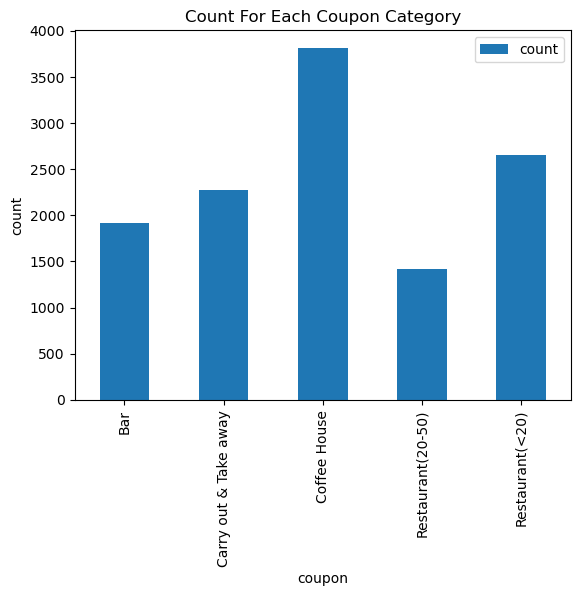

In [107]:
# We then plot a bar plt for coupon count
ax = data.groupby('coupon').count()[['destination']].rename(columns={'destination': 'count'}).plot.bar()
plt.title('Count For Each Coupon Category')
ax.set_ylabel('count')

6. Use a histogram to visualize the temperature column.

In [111]:
data['temperature'].value_counts()

temperature
80    6222
55    3662
30    2195
Name: count, dtype: int64

Text(0.5, 0, 'temperature')

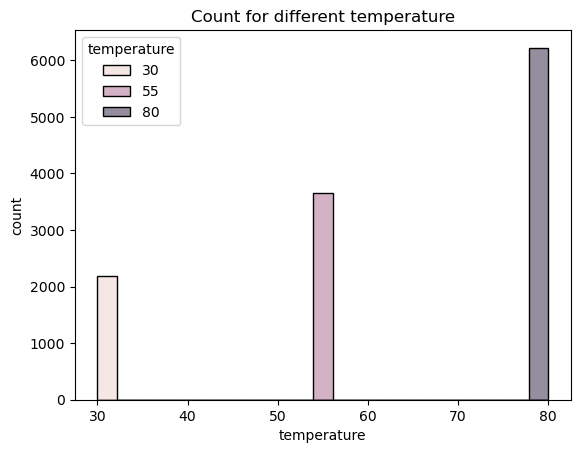

In [113]:
# data.hist(column = 'temperature')
# ax = data.plot.hist(column = 'temperature')
# use seaborn to plot, with different colors for temperature
ax = sns.histplot(data, x='temperature', hue='temperature')
plt.title('Count for different temperature')
ax.set_ylabel('count')
ax.set_xlabel('temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [117]:
dataBar = data.query('coupon == "Bar"')
dataBar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [120]:
dataBar['Y'].mean()

0.41191845269210664

In [122]:
# do it in a different approach
dataBar.query('Y == 1').shape[0] / dataBar.shape[0]

0.41191845269210664

41.2% of the Bar coupons are accepted

<br>

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [127]:
dataBar['Bar'].value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [129]:
LE3 = ['never', 'less1', '1~3']

In [286]:
barLE3 = dataBar.query('Bar in @LE3')['Y'].mean()
barLE3

0.37267441860465117

In [288]:
barGE4 = dataBar.query('Bar not in @LE3')['Y'].mean()
barGE4

0.7616580310880829

Those who went to a bar 4 or more times a month is much more likely (76.2%) to accept a bar coupon, which is expected.
<br>

Create a new DataFrame with these two acceptance rates for visualization

In [312]:
dataBar34 = pd.DataFrame(data = {'Bar': ['LE3', 'GE4'], 'rate': [barLE3, barGE4]})
dataBar34

,Bar,rate
0,LE3,0.372674
1,GE4,0.761658


Text(0.5, 0, 'Visit Frequency')

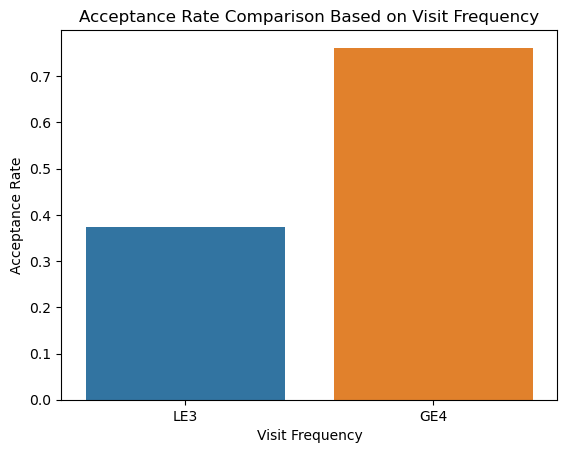

In [314]:
ax = sns.barplot(dataBar34, x = 'Bar', y = 'rate', hue = 'Bar')
plt.title('Acceptance Rate Comparison Based on Visit Frequency')
ax.set_ylabel('Acceptance Rate')
ax.set_xlabel('Visit Frequency')

<br>

Let's do query of went to a bar 4 or more times a month in a differemt way, to see if the result is consistent

In [141]:
# create the greater than or equal 4 list
GE4 = ['4~8', 'gt8']

In [143]:
# query with in instead of "not in"
dataBar.query('Bar in @GE4')['Y'].mean()

0.7616580310880829

The result is consistent as expected.

<br>

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [147]:
# check what valus exist in the 'age' column
dataBar['age'].value_counts()

age
21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: count, dtype: int64

In [149]:
# create a list for monthly frequency >= 1 and another list for age > 25
GE1 = ['1~3', '4~8', 'gt8']
age_GT25 = ['26', '31', '36', '41', '46', '50plus']

In [317]:
# drivers who go to a bar more than once a month and are over the age of 25
barGT25 = dataBar.query('Bar in @GE1 and age in @age_GT25')['Y'].mean()
barGT25

0.6898263027295285

In [321]:
# all others
barLE25 = dataBar.query('Bar not in @GE1 or age not in @age_GT25')['Y'].mean()
barLE25

0.33774834437086093

Drivers who go to a bar more than once a month and are over the age of 25 have higher acceptance rate than all others

Create a new DataFrame for visualization:

In [329]:
dataBar25 = pd.DataFrame(data = {'Bar_age': ['GE1_GT25', 'LT1_LE25'], 'rate': [barGT25, barLE25]})
dataBar25

,Bar_age,rate
0,GE1_GT25,0.689826
1,LT1_LE25,0.337748


Text(0.5, 0, 'Visit Frequency - Age')

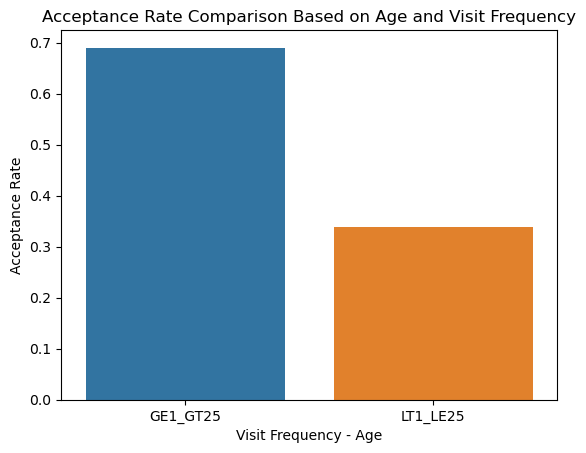

In [333]:
ax = sns.barplot(dataBar25, x = 'Bar_age', y = 'rate', hue = 'Bar_age')
plt.title('Acceptance Rate Comparison Based on Age and Visit Frequency')
ax.set_ylabel('Acceptance Rate')
ax.set_xlabel('Visit Frequency - Age')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [158]:
# check the values of 'passanger' column
dataBar['passanger'].value_counts()

passanger
Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: count, dtype: int64

In [160]:
# check the values of 'occupation' column
dataBar['occupation'].value_counts()

occupation
Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Phys

In [162]:
# drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
dataBar.query('passanger != "Kid(s)" and Bar in @GE1 and occupation != "Farming Fishing & Forestry"')['Y'].mean()

0.7094339622641509

In [164]:
# all others
dataBar.query('passanger == "Kid(s)" or Bar not in @GE1 or occupation == "Farming Fishing & Forestry"')['Y'].mean()

0.29790310918293567

<br>

Obviously, drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry are much more likyly to accept Bar coupons than the others (who have Kids as passanger and went to a bar less than once a month.....)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [168]:
# check the values of column 'maritalStatus'
dataBar['maritalStatus'].value_counts()

maritalStatus
Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: count, dtype: int64

In [170]:
# check the values of column 'income'
dataBar['income'].value_counts()

income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

In [172]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
dataBar.query('Bar in @GE1 and passanger != "Kid(s)" and maritalStatus != "Widowed"')['Y'].mean()

0.7094339622641509

In [174]:
age_LT30 = ['below21', '21', '26']

In [176]:
# go to bars more than once a month and are under the age of 30
dataBar.query('Bar in @GE1 and age in @age_LT30')['Y'].mean()

0.7195121951219512

In [178]:
# go to cheap restaurants more than 4 times a month and income is less than 50K
income_LT50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499','$37500 - $49999']
dataBar.query('Restaurant20To50 in @GE4 and income in @income_LT50k')['Y'].mean()

0.7464788732394366

all three categories of drivers are all quite likely to accept Bar coupons, the differences in probabilities are small and those who go to cheap restaurants more than 4 times a month and income is less than 50K are the most likely to accept Bar coupons

<br>

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

My hypothesis:
1. Those who went to a bar 4 or more times a month is highly likely to accept a bar coupon, at 76.2%
2. go to cheap restaurants more than 4 times a month and income is less than 50K are also very likly to accept, at 74.6%

Followed by:


3. go to bars more than once a month and are under the age of 30, at 72%
4. go to bars more than once a month, had passengers that were not a kid, and were not widowed, at 70.9%
5. go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry, also at 70.9%

<br>

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I am going to check what kind of drivers are more likely to accept __Coffee House__ coupons.

In [187]:
dataCoffee = data.query('coupon == "Coffee House"')
dataCoffee

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,1,Bachelors degree,Business & Financial,$100000 or More,less1,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,1,Bachelors degree,Business & Financial,$100000 or More,less1,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0


1. Let's first check the average acceptance rate of Coffee House coupons.

In [190]:
dataCoffee['Y'].mean()

0.49633123689727465

49.6% is what we have here.

2. Let's compare the acceptance rate between those who went to a Coffee House 3 or fewer times a month to those who went more

In [194]:
# those who went to a Coffee House 3 or fewer times a month
dataCoffee.query('CoffeeHouse in @LE3')['Y'].mean()

0.44590495449949447

In [196]:
# those who went more
dataCoffee.query('CoffeeHouse not in @LE3')['Y'].mean()

0.6725559481743227

As expected, those who went to a Coffee House 4 or more times a month are much more likely to accept to accept a Coffee House coupon

3. Compare the acceptance rate between drivers who go to a Coffee Hose more than once a month with income 50k or more to the all others

In [200]:
dataCoffee.query('CoffeeHouse in @GE1 and income not in @income_LT50k')['Y'].mean()

0.6168981481481481

In [202]:
dataCoffee.query('CoffeeHouse not in @GE1 or income in @income_LT50k')['Y'].mean()

0.46104336043360433

There is big enough difference (15%) in acceptance rate so I think it's a valid strategy to target drivers who go to a Coffee Hose more than once a month with income 50k

4. Let's compare drivers who went to a Coffee House more than once a month with friends as passengers and with a Bachelors or higher education to the others

In [206]:
# check what values exist for education column
dataCoffee['education'].value_counts()

education
Some college - no degree                  1328
Bachelors degree                          1276
Graduate degree (Masters or Doctorate)     587
Associates degree                          325
High School Graduate                       272
Some High School                            28
Name: count, dtype: int64

In [208]:
education_BS_PLUS = ['Bachelors degree', 'Graduate degree (Masters or Doctorate)']
# went to a Coffee House more than once a month with friends as passengers and with a Bachelors or higher education
dataCoffee.query('CoffeeHouse in @GE1 and education in @education_BS_PLUS and passanger == "Friend(s)"')['Y'].mean()

0.7556270096463023

In [210]:
# all the others
dataCoffee.query('CoffeeHouse not in @GE1 or education not in @education_BS_PLUS or passanger != "Friend(s)"')['Y'].mean()

0.47332382310984306

With a 75.6% acceptance rate, I think we have a good target group to send Coffee house coupons to. 

5. Let's see whether teamerarure affects whether drivers acept Coffee House coupons. Specifically who went to a Coffee House more than once a month when temperature is 30/55/80 and the exprration is 2 hours. 

In [214]:
dataCoffee.query('CoffeeHouse in @GE1 and temperature == 30 and expiration == "2h"')['Y'].mean()

0.3148148148148148

In [216]:
dataCoffee.query('CoffeeHouse in @GE1 and temperature == 55 and expiration == "2h"')['Y'].mean()

0.4581151832460733

In [218]:
dataCoffee.query('CoffeeHouse in @GE1 and temperature == 80 and expiration == "2h"')['Y'].mean()

0.6650406504065041

When temperature is 80 degree, the acceptance rate of 2-hours coupons is good for those who went to a Coffee House more than once a month

Let's see if 1-day coupons make a difference

In [222]:
# went to a Coffee House more than once a month when temperature is 80 and the exprration is 1-day
dataCoffee.query('CoffeeHouse in @GE1 and temperature == 80 and expiration == "1d"')['Y'].mean()

0.7755102040816326

The acceptance rate is even higher at 77.6%

6. Let's see how occupation and time of the day affect acceptance rate. For occupation, let me create a list of professional jobs since I think professionals are more flexible in work hours and more likley to take small breaks to a coffee house.

In [226]:
# check values of occupation
dataCoffee['occupation'].value_counts()

occupation
Unemployed                                   551
Student                                      475
Computer & Mathematical                      433
Sales & Related                              348
Education&Training&Library                   273
Management                                   271
Office & Administrative Support              192
Arts Design Entertainment Sports & Media     190
Retired                                      161
Business & Financial                         142
Food Preparation & Serving Related            77
Transportation & Material Moving              76
Healthcare Practitioners & Technical          71
Legal                                         69
Community & Social Services                   66
Healthcare Support                            65
Architecture & Engineering                    63
Life Physical Social Science                  61
Protective Service                            58
Construction & Extraction                     46
Installat

In [228]:
# values of time
dataCoffee['time'].value_counts()

time
6PM     1043
7AM      875
10AM     857
2PM      759
10PM     282
Name: count, dtype: int64

Let's see hoe time of the day affect acceptance rate

In [231]:
occupation_Professional = ['Computer & Mathematical', 'Management', 'Business & Financial', 'Healthcare Practitioners & Technical', 'Legal', 'Life Physical Social Science']
time_Morning = ['7AM', '10AM']
time_Afternoon = ['2PM', '6PM']
time_Evening = ['10PM']
# went to a Coffee House more than once a month, morning, professionals
dataCoffee.query('CoffeeHouse in @GE1 and time in @time_Morning and occupation in @occupation_Professional')['Y'].mean()

0.6842105263157895

In [233]:
# went to a Coffee House more than once a month, afternoon, professionals
dataCoffee.query('CoffeeHouse in @GE1 and time in @time_Afternoon and occupation in @occupation_Professional')['Y'].mean()

0.6446886446886447

In [235]:
# went to a Coffee House more than once a month, evening, professionals
dataCoffee.query('CoffeeHouse in @GE1 and time in @time_Evening and occupation in @occupation_Professional')['Y'].mean()

0.4838709677419355

Morning and afternoon have good acceptance rate if not great
Let's see whether gender makes a difference

In [238]:
# Male, went to a Coffee House more than once a month, morning, professionals
dataCoffee.query('gender == "Male" and CoffeeHouse in @GE1 and time in @time_Morning and occupation in @occupation_Professional')['Y'].mean()

0.6666666666666666

In [240]:
# Female, went to a Coffee House more than once a month, morning, professionals
dataCoffee.query('gender == "Female" and CoffeeHouse in @GE1 and time in @time_Morning and occupation in @occupation_Professional')['Y'].mean()

0.7075471698113207

We can see females are slightly more likely to accept coupons, 70.8% vs 66.7%.
Let's narrow down further to single females

In [243]:
# Female, single, went to a Coffee House more than once a month, morning, professionals
dataCoffee.query('gender == "Female" and maritalStatus == "Single" and CoffeeHouse in @GE1 and time in @time_Morning and occupation in @occupation_Professional')['Y'].mean()

0.7916666666666666

In [245]:
# Male, single, went to a Coffee House more than once a month, morning, professionals
dataCoffee.query('gender == "Male" and maritalStatus == "Single" and CoffeeHouse in @GE1 and time in @time_Morning and occupation in @occupation_Professional')['Y'].mean()

0.6610169491525424

With all these conditions, females are significantly more likley to accept coupons, 79.2% vs 66.1%.
Let's check afternoon and evening

In [248]:
# Female, single, went to a Coffee House more than once a month, afteroon, professionals
dataCoffee.query('gender == "Female" and maritalStatus == "Single" and CoffeeHouse in @GE1 and time in @time_Afternoon and occupation in @occupation_Professional')['Y'].mean()

0.7575757575757576

In [250]:
# Female, single, went to a Coffee House more than once a month, evening, professionals
dataCoffee.query('gender == "Female" and maritalStatus == "Single" and CoffeeHouse in @GE1 and time in @time_Evening and occupation in @occupation_Professional')['Y'].mean()

0.25

The afternoon session also has very high acceptance rate (75.8%) for female professionals, single, went to a Coffee House more than once a month

Overall we found several categories have very goood coffee house coupon acceptance rate:
1. Single female professionals who went to a Coffee House more than once a month in both morning (79.2%) and afternoon (75.8%)
2. The slighter broader group all female professionals who went to a Coffee House more than once a month in the morning is also good (70.8%)
3. Those who went to a coffee house more than once a month when temperature is 80 and the exprration is 1-day (77.6%)
4. Those who went to a Coffee House more than once a month with friends as passengers and with a Bachelors or higher education (75.6%)